## K-Means Clustering

In [28]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', 100)

In [29]:
df = pd.read_excel('marketing_campaign1.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### Data Preprocessing

In [30]:
# Checking for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [31]:
# Imputing Missing values
df['Income'].fillna(df['Income'].median(), inplace=True)

In [32]:
# Converting Categorical features into numerical variables
dt = pd.get_dummies(df[['Education', 'Marital_Status']])
df = pd.concat([df, dt], axis=1)

# Dropping the original columns (categorical)
df.drop(columns=['Education', 'Marital_Status', 'ID'], inplace=True)

In [33]:
# Removing Outliers from Income and Year_Birth based on the finding in EDA

from scipy import stats

for i in df[['Income', 'Year_Birth']]:
    z_score = stats.zscore(df[i])
    filtered_data = (abs(z_score) < 5)
    df = df[filtered_data]

#### Feature Engineering

In [34]:
# Creating a new feature using Dt_Customer
df['CustomerLifetime'] = pd.datetime.now().year - df['Dt_Customer'].dt.year

# Dropping Dt_Customer column
df.drop(columns=['Dt_Customer'], inplace=True)
df.drop(columns=['Z_CostContact'],inplace=True)

In [35]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#### Dimensionality Reduction

In [36]:
# Reducing number of dimensions using PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(scaled_data)

array([[ 3.81258701e+00, -7.07828720e-01, -4.37015468e-01, ...,
         1.35710627e-14,  5.38201111e-16,  2.68886645e-16],
       [-2.35048994e+00, -5.44059604e-01, -3.13370705e-01, ...,
        -2.94140880e-15, -2.20405232e-16, -1.47299150e-16],
       [ 1.70817134e+00, -3.48520471e-01, -1.37901317e+00, ...,
         7.73215784e-15,  5.98547119e-16,  2.58904083e-16],
       ...,
       [ 1.48039158e+00, -8.33393326e-02,  5.88182604e-01, ...,
         6.84133193e-16,  1.92383093e-17, -4.14244701e-17],
       [ 1.73098087e+00,  1.23518440e+00, -1.05109551e+00, ...,
        -2.36272230e-16, -1.19273880e-16,  2.93435196e-19],
       [-1.58762774e+00,  1.91902162e+00,  1.36687808e+00, ...,
         4.37681925e-16,  2.08547256e-16,  6.35685455e-18]])

In [37]:
# Calulating Explained Variance and Cumulative Explained Variance
import numpy as np

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

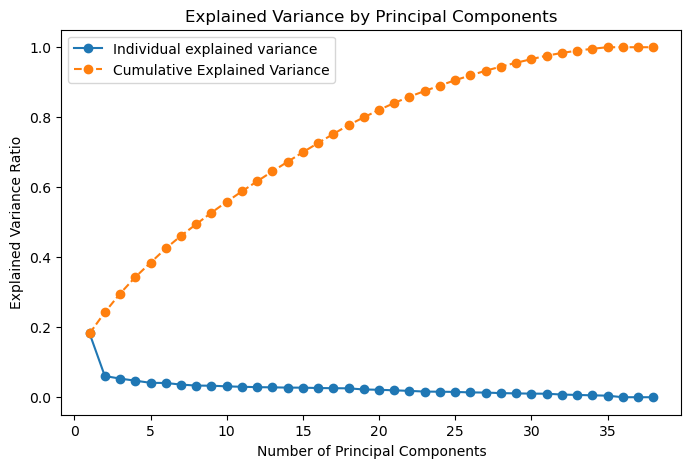

In [38]:
# Plotting explained variance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_variance) + 1),
    explained_variance,
    marker = 'o',
    label = 'Individual explained variance'
)
plt.plot(
    range(1, len(explained_variance) + 1),
    cumulative_explained_variance,
    marker = 'o',
    linestyle = '--',
    label = 'Cumulative Explained Variance'
)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

##### Optimal Number of Components

In [39]:
# Finding the optimal number of components
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Optimal number of components to explain 95% of the variance: {optimal_components}')

Optimal number of components to explain 95% of the variance: 29


In [40]:
# Transforming data with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
optimal_data = pca_optimal.fit_transform(scaled_data)

### K-Means Clustering

In [41]:
from sklearn.cluster import KMeans

#### Silhouette score

Determining the optimal nubmer of clusters using silhouette score

In [42]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=42
    )
    kmeans.fit(optimal_data)
    score = silhouette_score(optimal_data, kmeans.labels_)
    silhouette_scores.append(score)

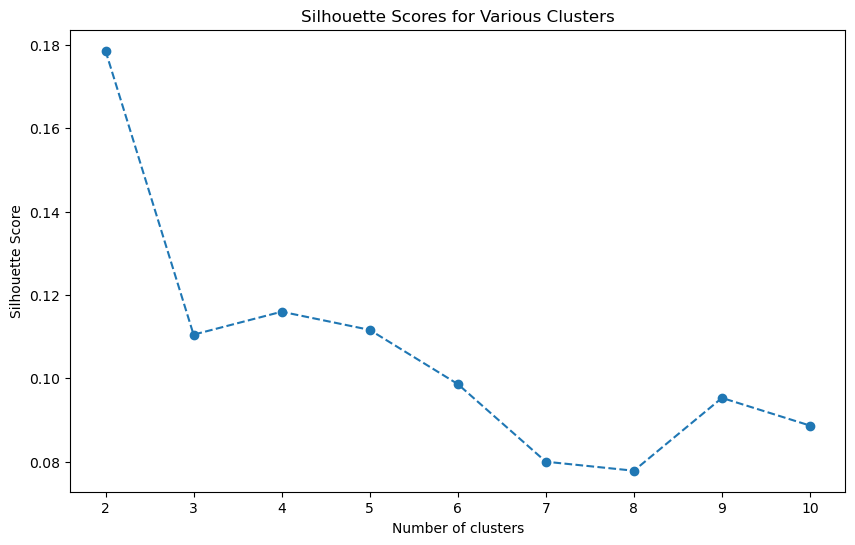

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    marker='o',
    linestyle='--'
)
plt.title('Silhouette Scores for Various Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Higher the Silhouette Score the better. (Close to 1)\
Neagative Score indicative weak performance.

#### Elbow Method

Determining the optimal number of clusters using elbow method

In [44]:
wcss = [] # Within Clusters Sum of Squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=42
    )
    kmeans.fit(optimal_data)
    wcss.append(kmeans.inertia_)

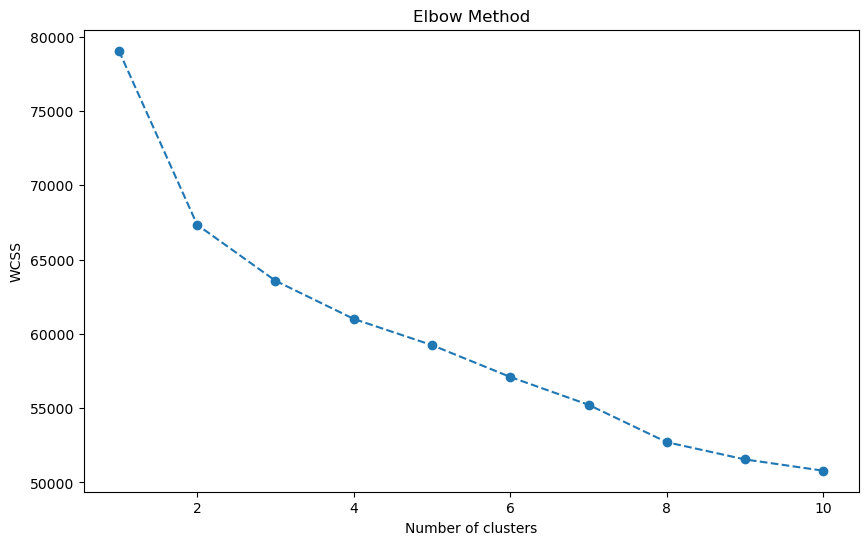

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal K value is the point at which the graph forms an elbow.\
In this case, K = 2

#### Evaluating Cluster

Based on the findings of Elbow Method and Silhouette score the optimal number of clusters is 2.

In [46]:
# Building Cluster using optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(optimal_data)

KMeans(n_clusters=2, random_state=42)

In [47]:
# Getting Clusters
kmeans_lables = kmeans.labels_

In [48]:
# Add K-means cluster label into the dataset
dt = df
dt['Kmeans_cluster'] = kmeans_lables

# Analyzing characteristics of each cluster
cluster_analysis = dt.groupby('Kmeans_cluster').mean()
cluster_analysis

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_Revenue,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,CustomerLifetime
Kmeans_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1967.155932,71466.080226,0.064407,0.427119,49.553672,607.329944,56.192090,364.218079,79.707345,58.003390,76.294915,1.993220,5.789831,5.359322,8.570621,3.671186,0.081356,0.133333,0.183051,0.154802,0.031638,0.007910,11.0,0.233898,0.083616,0.00113,0.533333,0.148023,0.233898,0.00226,0.000000,0.114124,0.369492,0.213559,0.255367,0.045198,0.00000,11.038418
1,1970.039230,39169.921540,0.692820,0.558845,48.829756,105.508512,6.678756,37.780903,9.911177,6.823834,22.816432,2.544041,2.972613,0.897113,3.977794,6.398224,0.067358,0.036269,0.000000,0.005181,0.001480,0.009623,11.0,0.094004,0.094004,0.03923,0.484086,0.176906,0.205774,0.00000,0.002221,0.096225,0.397483,0.214656,0.260548,0.027387,0.00148,10.928942


#### Visualizing Cluster

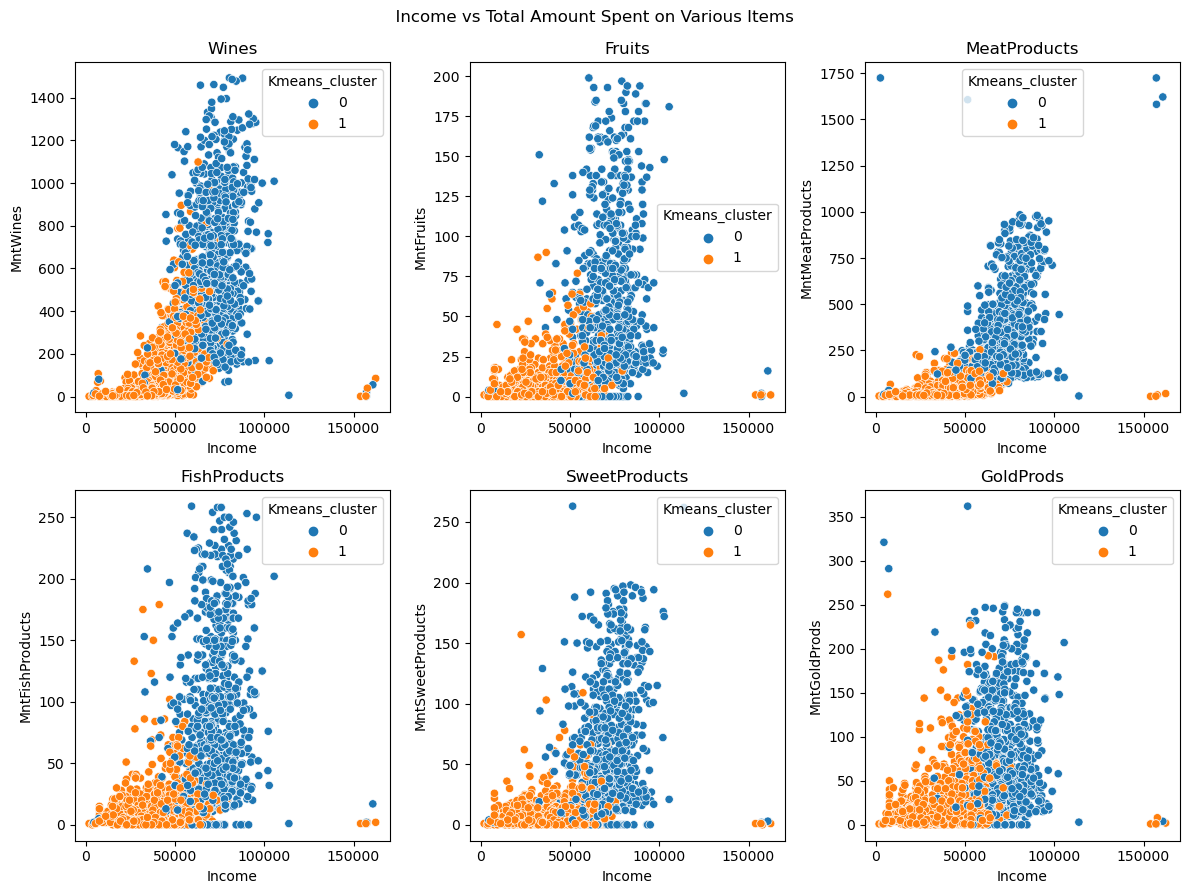

In [49]:
# Relationship between Income and Total Amount Spent on Various Items
plt.figure(figsize=(12,13))
for i, col in enumerate(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x='Income', y=col, hue='Kmeans_cluster', data=dt)
    plt.xlabel('Income')
    plt.title(col[3:])
plt.suptitle('  Income vs Total Amount Spent on Various Items  ')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

#### Cluster Statistical Summary 

In [50]:
results = pd.DataFrame({
    'cluster1': cluster_analysis.loc[0][['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']],
    'cluster2': cluster_analysis.loc[1][['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
})

In [51]:
print('Mean Income (Annual) and Mean (monthly) spends across products: ')
display(results)

Mean Income (Annual) and Mean (monthly) spends across products: 


,cluster1,cluster2
Income,71466.080226,39169.921540
MntWines,607.329944,105.508512
MntFruits,56.192090,6.678756
MntMeatProducts,364.218079,37.780903
MntFishProducts,79.707345,9.911177
MntSweetProducts,58.003390,6.823834
MntGoldProds,76.294915,22.816432


Based on the above clusters,\
Cluster 0 can be categorised as high spending group,\
whereas Cluster 1 can be categorised as moderate spending group,\
with respect to their income levels and needs.